In [ ]:
pip install pandas mlxtend

# Data Understanding

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('https://raw.githubusercontent.com/bebekgarut/association-rules-apriori-southeast-asian-food/refs/heads/main/dataset/resep_masakan.csv')
print("\nContoh data awal:")
print(df.head())
print(df.info())
print(df.describe())


Contoh data awal:
      negara           masakan  \
0  Indonesia       Nasi Goreng   
1  Indonesia         Miee Aceh   
2  Indonesia  Tahu Tempe Bacem   
3  Indonesia       Ayam Goreng   
4  Indonesia       Soto Padang   

                                               bahan  \
0  nasi, ayam, bawang merah, bawang putih, kecap ...   
1  daging sapi, udang, kaldu, kol, tauge, mie ace...   
2  tahu, tempe, asam, kecap manis, air kelapa par...   
3  ayam, merica, garam, jeruk nipis, asam, lengku...   
4  daging sapi, air, minyak goreng, serai, daun s...   

                        gambar               gambarnegara  
0  img/makanan/nasi-goreng.png  img/bendera/Indonesia.png  
1     img/makanan/mie-aceh.png  img/bendera/Indonesia.png  
2                          NaN  img/bendera/Indonesia.png  
3                          NaN  img/bendera/Indonesia.png  
4                          NaN  img/bendera/Indonesia.png  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data co

# Data Processing

In [ ]:
df['bahan'] = df['bahan'].apply(lambda x: [i.strip().lower() for i in x.split(',')] if isinstance(x, str) else x)
print("Contoh hasil preprocessing:")
print(df[['masakan', 'bahan']].head())

semua_bahan = [item for sublist in df['bahan'] for item in sublist]
print("\nJumlah total bahan di semua resep:", len(semua_bahan))

# Bahan unik
bahan_unik = set(semua_bahan)
print("Jumlah bahan unik:", len(bahan_unik))
print("Contoh bahan unik:", sorted(list(bahan_unik)))

Contoh hasil preprocessing:
            masakan                                              bahan
0       Nasi Goreng  [nasi, ayam, bawang merah, bawang putih, kecap...
1         Miee Aceh  [daging sapi, udang, kaldu, kol, tauge, mie ac...
2  Tahu Tempe Bacem  [tahu, tempe, asam, kecap manis, air kelapa pa...
3       Ayam Goreng  [ayam, merica, garam, jeruk nipis, asam, lengk...
4       Soto Padang  [daging sapi, air, minyak goreng, serai, daun ...

Jumlah total bahan di semua resep: 921
Jumlah bahan unik: 200
Contoh bahan unik: ['acar lobak', 'acar sayuran', 'air', 'air kelapa parut', 'asam', 'ayam', 'bagoong', 'baguette', 'baking powder', 'bakso', 'bakso ikan', 'bawang', 'bawang bombay', 'bawang merah', 'bawang putih', 'bayam', 'beras', 'beras ketan', 'bihun', 'biji mustard', 'biji wijen', 'bubuk cabai', 'bubuk kari', 'bubuk koya', 'bumbu rempah', 'buncis', 'bunga lawang', 'bunga pisang', 'cabai', 'cengkeh', 'cuka', 'cumie-cumie', 'daging babi', 'daging ham', 'daging kerbau', 'dagin

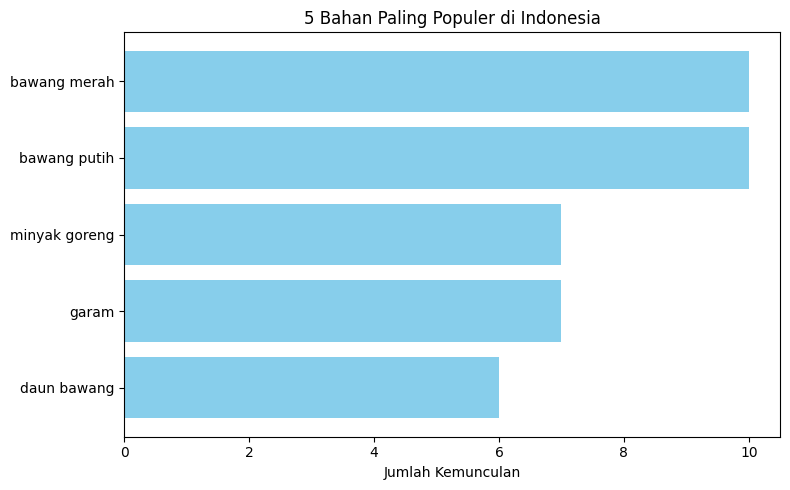

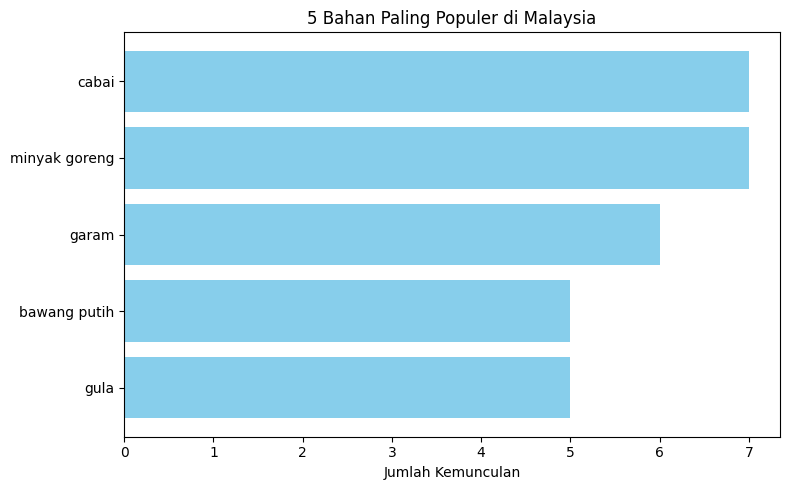

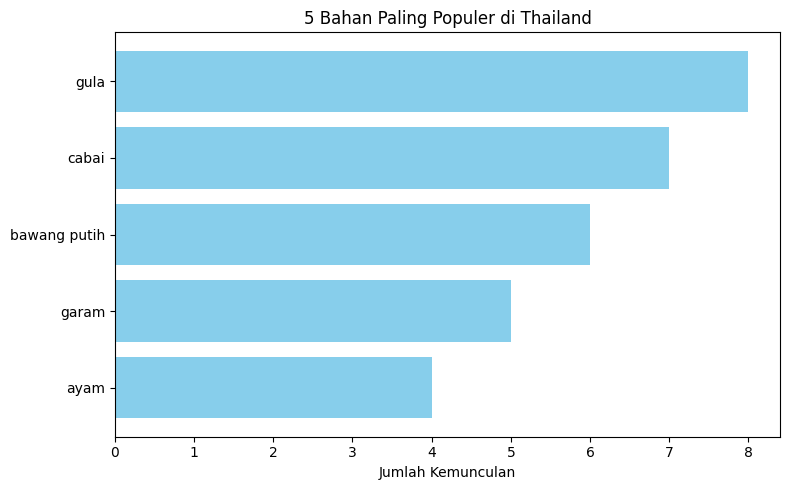

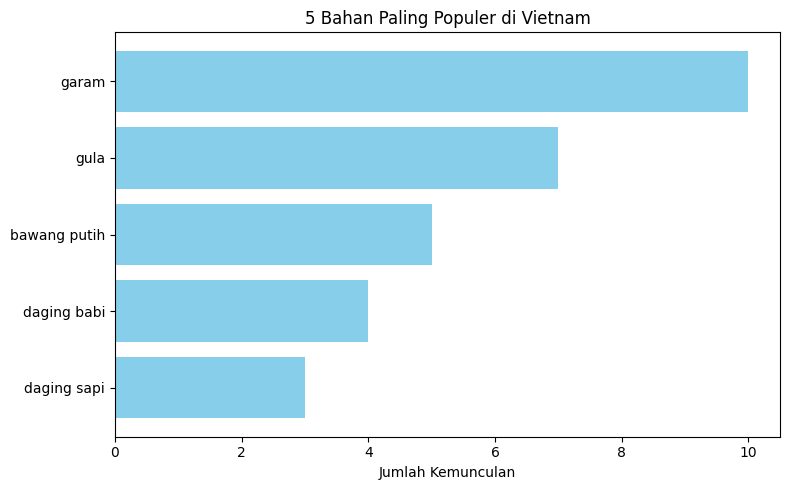

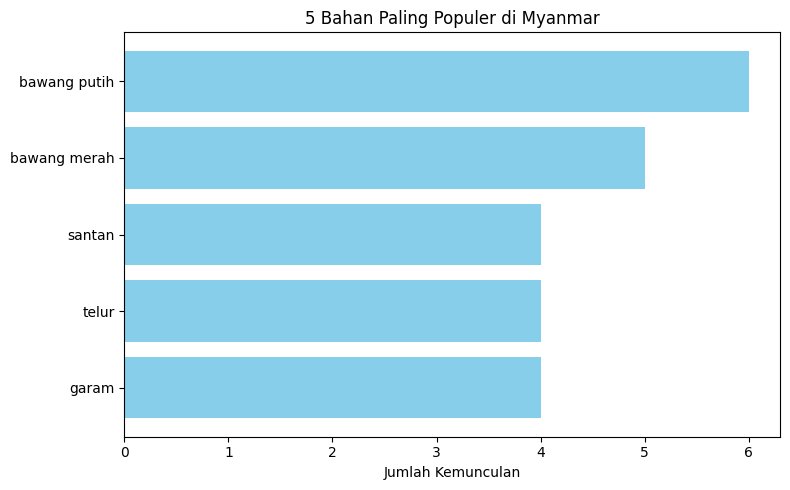

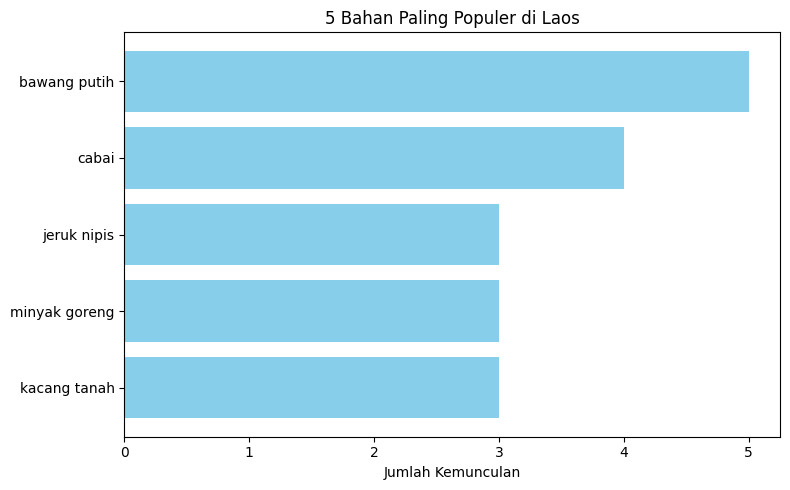

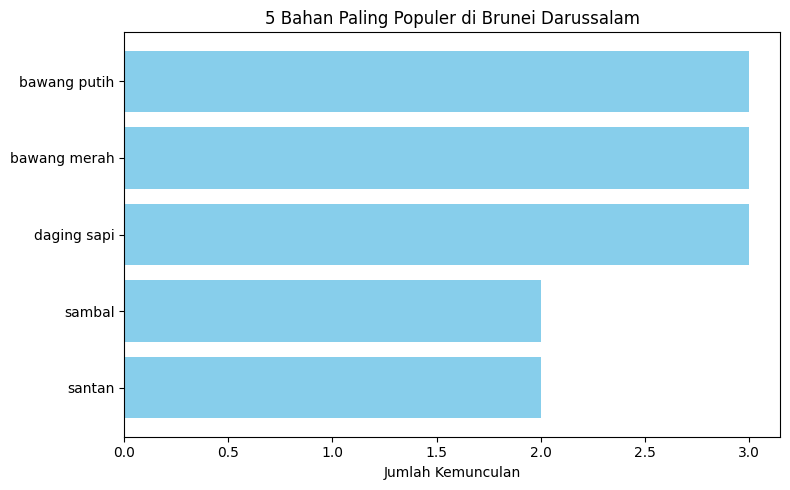

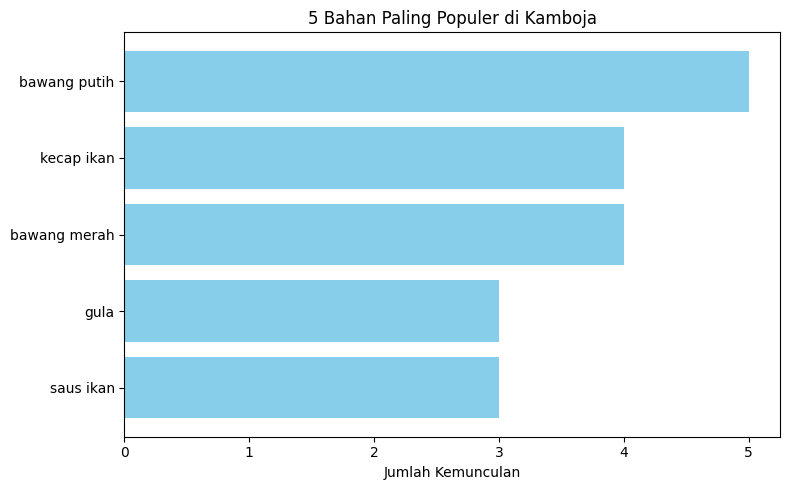

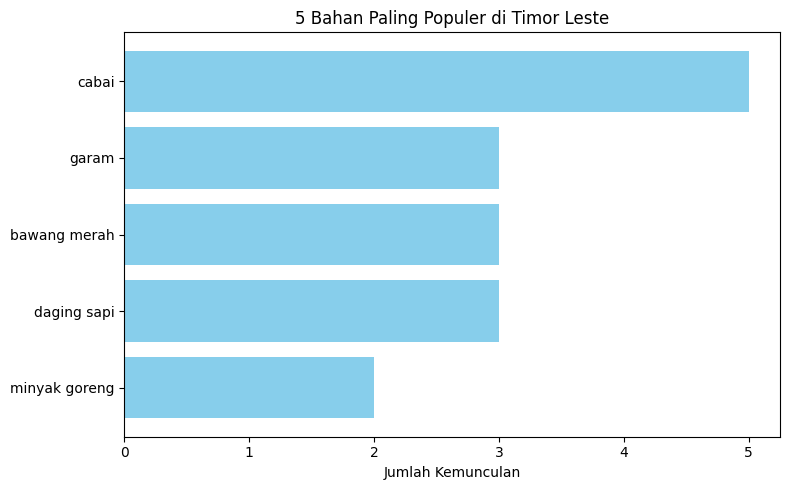

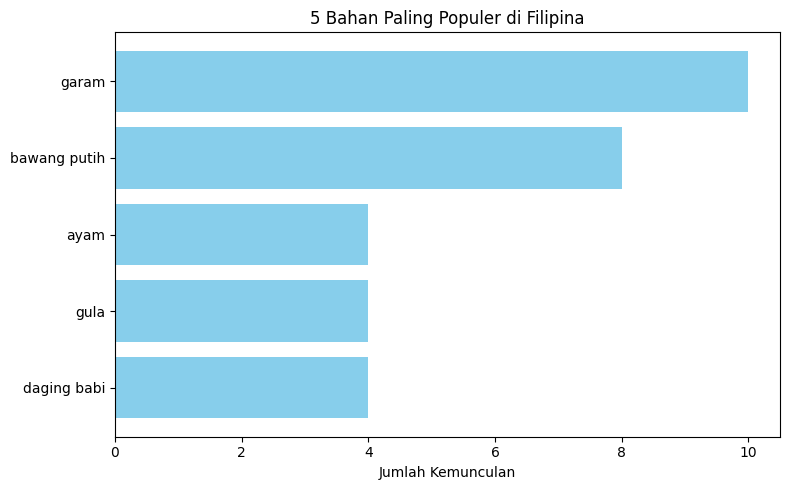

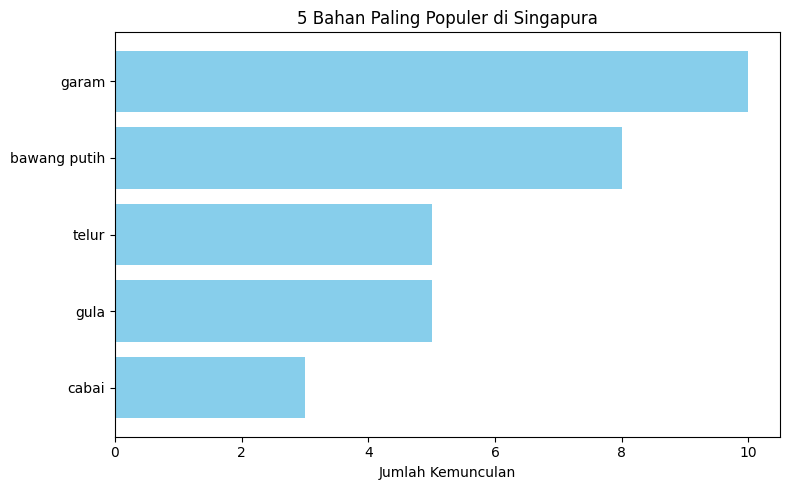

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

negara_unik = df['negara'].unique()

for negara in negara_unik:
    bahan_per_negara = df[df['negara'] == negara]['bahan'].explode()

    bahan_counter = Counter(bahan_per_negara)
    most_common = bahan_counter.most_common(5)

    if most_common:
        labels, values = zip(*most_common)
    else:
        labels, values = [], []

    plt.figure(figsize=(8, 5))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Jumlah Kemunculan')
    plt.title(f'5 Bahan Paling Populer di {negara}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()


# PENERAPAN ALGORITMA

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
aturan_per_negara = {}

for negara in df['negara'].unique():
    print(f"\n=== Negara: {negara} ===")
    df_negara = df[df['negara'] == negara]

    te = TransactionEncoder()
    te_ary = te.fit(df_negara['bahan']).transform(df_negara['bahan'])
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True, max_len=3)
    frequent_itemsets['negara'] = negara
    frequent_itemsets['panjang_itemset'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    display(frequent_itemsets.sort_values(by='support', ascending=False))

    if not frequent_itemsets.empty:
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
        rules_filtered = rules[(rules['support'] >= 0.1) & (rules['lift'] > 1.0)]
        aturan_per_negara[negara] = rules_filtered

        display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='confidence', ascending=False))
    else:
        print("Tidak ada itemset yang memenuhi syarat.")
        aturan_per_negara[negara] = pd.DataFrame()


=== Negara: Indonesia ===


,support,itemsets,negara,panjang_itemset
6,1.0,(bawang putih),Indonesia,1
5,0.9,(bawang merah),Indonesia,1
205,0.9,"(bawang putih, bawang merah)",Indonesia,2
301,0.7,"(bawang putih, minyak goreng)",Indonesia,2
273,0.7,"(garam, bawang putih)",Indonesia,2
...,...,...,...,...
2718,0.1,"(bawang merah, kunyit, jahe)",Indonesia,3
2717,0.1,"(kemiri, bawang merah, jahe)",Indonesia,3
2716,0.1,"(bawang merah, kemangi, jahe)",Indonesia,3
2715,0.1,"(bawang merah, jahe, kecap manis)",Indonesia,3


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
20149,(udang),"(tauge, tomat)",0.1,1.0,10.000000
20148,"(udang, tomat)",(tauge),0.1,1.0,3.333333
1,(air),(bawang putih),0.5,1.0,1.000000
2,(bayam),(air),0.1,1.0,2.000000
3,(beras),(air),0.1,1.0,2.000000
...,...,...,...,...,...
85,(ayam),(jeruk nipis),0.3,0.6,1.500000
99,(ayam),(serai),0.3,0.6,1.000000
34,(air),(merica),0.3,0.6,1.500000
36,(air),(minyak goreng),0.3,0.6,0.857143



=== Negara: Malaysia ===


,support,itemsets,negara,panjang_itemset
41,0.7,(minyak goreng),Malaysia,1
17,0.6,(garam),Malaysia,1
11,0.6,(cabai),Malaysia,1
184,0.5,"(bawang putih, cabai)",Malaysia,2
320,0.5,"(garam, gula)",Malaysia,2
...,...,...,...,...
1205,0.1,"(bawang bombay, cuka, jahe)",Malaysia,3
1206,0.1,"(kecap asin, cuka, bawang bombay)",Malaysia,3
1207,0.1,"(kentang, bawang bombay, cuka)",Malaysia,3
1208,0.1,"(bawang bombay, kunyit, cuka)",Malaysia,3


,antecedents,consequents,support,confidence,lift
9599,"(tauge, telur)",(udang),0.2,1.0,2.5
9598,(tahu),"(tepung terigu, udang)",0.1,1.0,10.0
9597,"(tepung terigu, udang)",(tahu),0.1,1.0,10.0
9596,"(tahu, udang)",(tepung terigu),0.1,1.0,5.0
9595,"(tahu, tepung terigu)",(udang),0.1,1.0,2.5
...,...,...,...,...,...
4996,"(garam, cabai)",(kunyit),0.3,0.6,2.0
5081,(gula),"(lengkuas, cabai)",0.3,0.6,1.5
5027,"(garam, cabai)",(santan),0.3,0.6,2.0
143,(bawang putih),(lengkuas),0.3,0.6,1.5



=== Negara: Thailand ===


,support,itemsets,negara,panjang_itemset
12,0.8,(gula),Thailand,1
5,0.7,(cabai),Thailand,1
165,0.6,"(gula, cabai)",Thailand,2
4,0.6,(bawang putih),Thailand,1
11,0.5,(garam),Thailand,1
...,...,...,...,...
649,0.1,"(ketumbar, lengkuas, ayam)",Thailand,3
648,0.1,"(terong, kemangi, ayam)",Thailand,3
647,0.1,"(terasi, kemangi, ayam)",Thailand,3
646,0.1,"(santan, kemangi, ayam)",Thailand,3


,antecedents,consequents,support,confidence,lift
4971,(wortel),"(udang, tomat)",0.1,1.0,10.000000
0,(asam),(bawang merah),0.1,1.0,3.333333
1,(asam),(bawang putih),0.1,1.0,1.666667
2,(asam),(cabai),0.1,1.0,1.428571
3,(asam),(garam),0.1,1.0,2.000000
...,...,...,...,...,...
822,(garam),"(ayam, cabai)",0.3,0.6,2.000000
936,(garam),"(gula, ayam)",0.3,0.6,2.000000
761,(garam),"(bawang putih, ayam)",0.3,0.6,1.500000
177,(garam),(kecap ikan),0.3,0.6,1.500000



=== Negara: Vietnam ===


,support,itemsets,negara,panjang_itemset
12,1.0,(garam),Vietnam,1
171,0.7,"(garam, gula)",Vietnam,2
13,0.7,(gula),Vietnam,1
4,0.5,(bawang putih),Vietnam,1
81,0.5,"(bawang putih, garam)",Vietnam,2
...,...,...,...,...
319,0.1,"(garam, gula, asam)",Vietnam,3
320,0.1,"(garam, ikan, asam)",Vietnam,3
321,0.1,"(garam, asam, nanas)",Vietnam,3
322,0.1,"(garam, okra, asam)",Vietnam,3


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
2441,(tauge),"(tepung beras, udang)",0.1,1.000000,10.000000
0,(acar sayuran),(daging babi),0.1,1.000000,2.500000
1,(acar sayuran),(garam),0.1,1.000000,1.000000
2,(acar sayuran),(gula),0.1,1.000000,1.428571
3,(acar sayuran),(nasi),0.1,1.000000,10.000000
...,...,...,...,...,...
778,(daging sapi),"(bawang putih, garam)",0.2,0.666667,1.333333
45,(daging sapi),(bawang putih),0.2,0.666667,1.333333
814,"(bawang putih, garam)",(gula),0.3,0.600000,0.857143
816,(bawang putih),"(garam, gula)",0.3,0.600000,0.857143



=== Negara: Myanmar ===


,support,itemsets,negara,panjang_itemset
6,0.6,(bawang putih),Myanmar,1
5,0.5,(bawang merah),Myanmar,1
41,0.4,(telur),Myanmar,1
37,0.4,(santan),Myanmar,1
17,0.4,(garam),Myanmar,1
...,...,...,...,...
365,0.1,"(ayam, minyak goreng, bubuk cabai)",Myanmar,3
366,0.1,"(santan, ayam, bubuk cabai)",Myanmar,3
367,0.1,"(ayam, telur, bubuk cabai)",Myanmar,3
368,0.1,"(bubuk kari, daun bawang, ayam)",Myanmar,3


,antecedents,consequents,support,confidence,lift
2763,(serai),"(tepung beras, telur)",0.1,1.000000,10.000000
0,(acar lobak),(bawang putih),0.1,1.000000,1.666667
1,(acar lobak),(bihun),0.1,1.000000,3.333333
2,(acar lobak),(daging sapi),0.1,1.000000,5.000000
3,(kaldu),(acar lobak),0.1,1.000000,10.000000
...,...,...,...,...,...
88,(bihun),(daging sapi),0.2,0.666667,3.333333
40,(bawang putih),(bawang merah),0.4,0.666667,1.333333
63,(bihun),(bawang putih),0.2,0.666667,1.111111
42,(bihun),(bawang merah),0.2,0.666667,1.333333



=== Negara: Laos ===


,support,itemsets,negara,panjang_itemset
2,0.5,(bawang putih),Laos,1
4,0.4,(cabai),Laos,1
15,0.3,(kacang tanah),Laos,1
14,0.3,(jeruk nipis),Laos,1
72,0.3,"(bawang putih, minyak goreng)",Laos,2
...,...,...,...,...
233,0.1,"(bawang merah, mie beras, ayam)",Laos,3
234,0.1,"(bawang putih, cabai, ayam)",Laos,3
235,0.1,"(bawang putih, daun bawang, ayam)",Laos,3
236,0.1,"(garam, bawang putih, ayam)",Laos,3


,antecedents,consequents,support,confidence,lift
1779,(tomat),"(wortel, saus bawang putih)",0.1,1.000000,10.000000
0,(bawang merah),(ayam),0.1,1.000000,5.000000
1,(ayam),(bawang putih),0.2,1.000000,2.000000
2,(kaldu),(ayam),0.1,1.000000,5.000000
1763,"(wortel, roti baguette)",(saus bawang putih),0.1,1.000000,10.000000
...,...,...,...,...,...
159,(minyak goreng),(wijen),0.2,0.666667,3.333333
102,(kacang tanah),(jeruk nipis),0.2,0.666667,2.222222
103,(jeruk nipis),(kacang tanah),0.2,0.666667,2.222222
32,(jeruk nipis),(cabai),0.2,0.666667,1.666667



=== Negara: Brunei Darussalam ===


,support,itemsets,negara,panjang_itemset
1,0.3,(bawang merah),Brunei Darussalam,1
5,0.3,(daging sapi),Brunei Darussalam,1
2,0.3,(bawang putih),Brunei Darussalam,1
30,0.2,(tepung beras),Brunei Darussalam,1
47,0.2,"(bawang putih, daging sapi)",Brunei Darussalam,2
...,...,...,...,...
172,0.1,"(mentimun, merica, saus pedas)",Brunei Darussalam,3
173,0.1,"(mentimun, merica, udang)",Brunei Darussalam,3
174,0.1,"(mentimun, udang, saus pedas)",Brunei Darussalam,3
175,0.1,"(merica, udang, saus pedas)",Brunei Darussalam,3


,antecedents,consequents,support,confidence,lift
449,(saus tiram),"(mie telur, sambal)",0.1,1.000000,10.000000
0,(nasi),(ayam),0.1,1.000000,10.000000
433,"(mentimun, udang)",(saus pedas),0.1,1.000000,10.000000
432,(udang),"(mentimun, merica)",0.1,1.000000,10.000000
431,(merica),"(mentimun, udang)",0.1,1.000000,10.000000
...,...,...,...,...,...
2,(ayam),(sambal),0.1,1.000000,5.000000
3,(bawang putih),(bawang merah),0.2,0.666667,2.222222
4,(bawang merah),(bawang putih),0.2,0.666667,2.222222
14,(bawang putih),(daging sapi),0.2,0.666667,2.222222



=== Negara: Kamboja ===


,support,itemsets,negara,panjang_itemset
3,0.5,(bawang putih),Kamboja,1
19,0.4,(kecap ikan),Kamboja,1
101,0.4,"(bawang putih, kecap ikan)",Kamboja,2
2,0.4,(bawang merah),Kamboja,1
34,0.3,(saus ikan),Kamboja,1
...,...,...,...,...
996,0.1,"(wortel, nasi, telur)",Kamboja,3
995,0.1,"(wortel, nasi, sosis)",Kamboja,3
994,0.1,"(nasi, telur, sosis)",Kamboja,3
993,0.1,"(wortel, nasi, sawi putih)",Kamboja,3


,antecedents,consequents,support,confidence,lift
3005,(sosis),"(wortel, telur)",0.1,1.000000,10.000000
0,(ayam),(bawang putih),0.1,1.000000,2.000000
1,(ayam),(daun bawang),0.1,1.000000,5.000000
2,(ayam),(garam),0.1,1.000000,3.333333
3,(ayam),(gula),0.1,1.000000,3.333333
...,...,...,...,...,...
98,(garam),(gula),0.2,0.666667,2.222222
80,(gula),(daging sapi),0.2,0.666667,3.333333
24,(bawang putih),(bawang merah),0.3,0.600000,1.500000
1056,(bawang putih),"(gula, kecap ikan)",0.3,0.600000,2.000000



=== Negara: Timor Leste ===


,support,itemsets,negara,panjang_itemset
6,0.5,(cabai),Timor Leste,1
9,0.3,(daging sapi),Timor Leste,1
14,0.3,(garam),Timor Leste,1
4,0.3,(bawang merah),Timor Leste,1
5,0.2,(bawang putih),Timor Leste,1
...,...,...,...,...
192,0.1,"(jagung, labu kuning, kacang hijau)",Timor Leste,3
193,0.1,"(jagung, minyak zaitun, kacang hijau)",Timor Leste,3
194,0.1,"(jagung, labu kuning, minyak zaitun)",Timor Leste,3
195,0.1,"(labu kuning, minyak zaitun, kacang hijau)",Timor Leste,3


,antecedents,consequents,support,confidence,lift
465,(wortel),"(kentang, tomat)",0.1,1.000000,10.000000
0,(air),(daging sapi),0.1,1.000000,3.333333
449,"(jagung, labu kuning)",(minyak zaitun),0.1,1.000000,10.000000
448,(kacang hijau),"(jagung, minyak zaitun)",0.1,1.000000,10.000000
447,(minyak zaitun),"(jagung, kacang hijau)",0.1,1.000000,10.000000
...,...,...,...,...,...
69,(garam),(minyak goreng),0.2,0.666667,3.333333
34,(daging sapi),(cabai),0.2,0.666667,1.333333
21,(garam),(bawang merah),0.2,0.666667,2.222222
22,(bawang merah),(garam),0.2,0.666667,2.222222



=== Negara: Filipina ===


,support,itemsets,negara,panjang_itemset
15,1.0,(garam),Filipina,1
97,0.8,"(bawang putih, garam)",Filipina,2
5,0.8,(bawang putih),Filipina,1
16,0.4,(gula),Filipina,1
451,0.4,"(bawang putih, garam, gula)",Filipina,3
...,...,...,...,...
10,0.1,(cuka),Filipina,1
684,0.1,"(wortel, kecap, minyak goreng)",Filipina,3
685,0.1,"(kentang, merica, kubis)",Filipina,3
686,0.1,"(kentang, saus ikan, kubis)",Filipina,3


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
1760,(mie),"(wortel, minyak goreng)",0.1,1.000000,10.000000
1744,"(wortel, kol)",(mie),0.1,1.000000,10.000000
1743,"(mie, wortel)",(kol),0.1,1.000000,10.000000
1742,(kol),"(mie, minyak goreng)",0.1,1.000000,10.000000
1741,(mie),"(kol, minyak goreng)",0.1,1.000000,10.000000
...,...,...,...,...,...
1195,(cabai),"(garam, daging babi)",0.2,0.666667,1.666667
1226,(cabai),"(garam, santan)",0.2,0.666667,3.333333
100,(cabai),(santan),0.2,0.666667,3.333333
95,(cabai),(daging babi),0.2,0.666667,1.666667



=== Negara: Singapura ===


,support,itemsets,negara,panjang_itemset
11,1.0,(garam),Singapura,1
89,0.8,"(garam, bawang putih)",Singapura,2
4,0.8,(bawang putih),Singapura,1
167,0.5,"(garam, gula)",Singapura,2
195,0.5,"(garam, telur)",Singapura,2
...,...,...,...,...
361,0.1,"(bawang bombay, bihun, tauge)",Singapura,3
360,0.1,"(bawang bombay, santan, bihun)",Singapura,3
359,0.1,"(garam, bawang bombay, bihun)",Singapura,3
358,0.1,"(bawang putih, bawang bombay, udang)",Singapura,3


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
2852,(tuco),"(tauge, udang)",0.1,1.0,10.000000
0,(air),(garam),0.1,1.0,1.000000
1,(air),(minyak goreng),0.1,1.0,3.333333
2,(air),(telur),0.1,1.0,2.000000
3,(tepung terigu),(air),0.1,1.0,10.000000
...,...,...,...,...,...
983,(telur),"(garam, bawang putih)",0.3,0.6,0.750000
1424,"(garam, gula)",(cabai),0.3,0.6,2.000000
75,(telur),(bawang putih),0.3,0.6,0.750000
90,(gula),(cabai),0.3,0.6,2.000000


In [ ]:
# Cetak hasil encoding
print(df_encoded.head())

     air   ayam  bawang bombay  bawang merah  bawang putih  bihun  cabai  \
0  False   True          False         False          True  False  False   
1  False  False          False         False          True  False   True   
2  False  False          False         False          True  False   True   
3  False  False          False         False          True  False  False   
4  False  False          False          True         False  False   True   

   daging babi  daging sapi  daun bawang  ...  saus tomat   tahu  tauge  \
0        False        False        False  ...       False  False  False   
1        False        False        False  ...        True  False  False   
2        False        False        False  ...       False   True  False   
3         True        False        False  ...       False  False  False   
4        False        False         True  ...       False  False   True   

   telur  tepung terigu  tomat   tuco  tusuk sate  udang  wortel  
0  False          False  

# Sistem Rekomendasi Berdasarkan Negara

In [ ]:
def rekomendasi_dan_resep_per_negara(bahan_input, negara, aturan_dict, df_resep):
    print(f"\nBahan dimiliki: {bahan_input}")
    if negara not in aturan_dict:
        print("Negara tidak ditemukan dalam aturan.")
        return

    rules_df = aturan_dict[negara]
    bahan_input_set = set(bahan_input)
    cocok_rules = []

    for _, row in rules_df.iterrows():
        if row['antecedents'].issubset(bahan_input_set) and not row['consequents'].issubset(bahan_input_set):
            cocok_rules.append(row)

    if not cocok_rules:
        print("\nTidak ada rekomendasi ditemukan dari aturan asosiasi.")
        return

    top_rule = sorted(cocok_rules, key=lambda x: x['confidence'], reverse=True)[0]
    tambahan = list(top_rule['consequents'])
    rekomendasi_set = bahan_input_set.union(tambahan)

    print(f"\nRekomendasi tambahan: {tambahan} (confidence={top_rule['confidence']:.2f}, lift={top_rule['lift']:.2f})")
    print(f"Bahan setelah direkomendasikan: {list(rekomendasi_set)}")

    df_negara = df_resep[df_resep['negara'] == negara].copy()
    df_negara['jumlah_cocok'] = df_negara['bahan'].apply(lambda x: len(rekomendasi_set.intersection(set(x))))
    df_cocok = df_negara[df_negara['jumlah_cocok'] > 0].sort_values(by='jumlah_cocok', ascending=False)

    if not df_cocok.empty:
        top_resep = df_cocok.iloc[0]
        print(f"\nResep terbaik yang cocok:")
        print(f"- {top_resep['masakan']} dari {top_resep['negara']}")
        print(f"  Bahan: {', '.join(top_resep['bahan'])}")
    else:
        print("\nTidak ada resep cocok ditemukan.")

rekomendasi_dan_resep_per_negara(['bawang merah'], 'Indonesia', aturan_per_negara, df)


Bahan dimiliki: ['bawang merah']

Rekomendasi tambahan: ['garam'] (confidence=0.78, lift=1.11)
Bahan setelah direkomendasikan: ['garam', 'bawang merah']

Resep terbaik yang cocok:
- Nasi Goreng dari Indonesia
  Bahan: nasi, ayam, bawang merah, bawang putih, kecap manis, telur, minyak goreng, garam


# Model Saving

In [ ]:
import pickle

with open('aturan_per_negara.pkl', 'wb') as f:
    pickle.dump(aturan_per_negara, f)

print("Model aturan berhasil disimpan.")

Model aturan berhasil disimpan.
